In [46]:
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [47]:
from sklearn.model_selection import train_test_split

pima = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix, access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_test.value_counts()


0    130
1     62
Name: Outcome, dtype: int64

In [48]:
print(len(y_train))
print(0.75*len(pima))

print(len(y_test))
print(0.25*len(pima))


576
576.0
192
192.0


In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("y predict:\n", y_pred)
print("y test:\n", y_test.values.T)


y predict:
 [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]
y test:
 [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


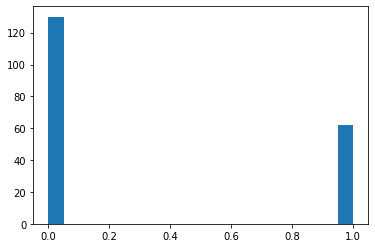

0    130
1     62
Name: Outcome, dtype: int64

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# create and plot a histogram based on y_test
plt.hist(y_test, bins=20)
plt.show()

# count how many are 0 and 1 (no diabetes, has diabetes)
y_test_pd_series = pd.Series(y_test)
y_test_pd_series.value_counts()

In [55]:
import numpy as np
def pred(y_test, y_predict):
    cm  = np.zeros((2, 2))
    for ri in [0, 1]: #for each index in each row
        for ci in [0, 1]:  #for each index in each col
            counter = 0
            for (yti, ypi) in zip(y_test, y_predict): #for each index in both Y test and Y predict
                if (yti == ri) & (ypi == ci): #if test index == row index + predicted index == col index 
                        counter += 1 #increment counter by 1 if 
            cm[ri, ci] = counter 
    return cm
# print the result of calculating our confusion matrix
print(pred(y_test, y_pred))

"""
"Milad's `Code`(not allowed to use)"
def comp_yt_yp(y_test, y_predict):
    # create a blank 2x2 confusion matrix (all 0s)
    conf_matrix  = np.zeros((2, 2))
    # indices that will create all confusion matrix values
    # TP (1,1), TN (0,0), FP (0, 1), FN (1, 0)
    for row_index in [0, 1]:
        for column_index in [0, 1]:
            counter = 0
            # iterate through all elements of y_test, y_predict,
            # which are all values of either 0 or 1
            for (yt_index, yp_index) in zip(y_test, y_predict):
                # comparing the elements of y_test and y_predict with each confusion matrix value (TP, TN, FP, FN),
                # and if there's a match for the confusion matrix value we're looking at, increment the counter
                if (yt_index == row_index) & (yp_index == column_index):
                        counter += 1
            # Add the total number of elements for the confusion matrix value,
            # then look at the next value in the loop
            conf_matrix[row_index, column_index] = counter 
    return conf_matrix

# print the result of calculating our confusion matrix
print(comp_yt_yp(y_test, y_pred))
"""

[[114.  16.]
 [ 46.  16.]]


'\n"Milad\'s `Code`(not allowed to use)"\ndef comp_yt_yp(y_test, y_predict):\n    # create a blank 2x2 confusion matrix (all 0s)\n    conf_matrix  = np.zeros((2, 2))\n    # indices that will create all confusion matrix values\n    # TP (1,1), TN (0,0), FP (0, 1), FN (1, 0)\n    for row_index in [0, 1]:\n        for column_index in [0, 1]:\n            counter = 0\n            # iterate through all elements of y_test, y_predict,\n            # which are all values of either 0 or 1\n            for (yt_index, yp_index) in zip(y_test, y_predict):\n                # comparing the elements of y_test and y_predict with each confusion matrix value (TP, TN, FP, FN),\n                # and if there\'s a match for the confusion matrix value we\'re looking at, increment the counter\n                if (yt_index == row_index) & (yp_index == column_index):\n                        counter += 1\n            # Add the total number of elements for the confusion matrix value,\n            # then look a

In [54]:

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[114  16]
 [ 46  16]]


In [57]:
logreg.predict(X_test)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
logreg.predict_proba(X_test)

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697],
       [0.67706284, 0.32293716],
       [0.17592894, 0.82407106],
       [0.65188551, 0.34811449],
       [0.81908609, 0.18091391],
       [0.57723535, 0.42276465],
       [0.84784349, 0.15215651],
       [0.55345312, 0.44654688],
       [0.92650973, 0.07349027],
       [0.53364769, 0.46635231],
       [0.64953808, 0.35046192],
       [0.52797559, 0.47202441],
       [0.60807542, 0.39192458],
       [0.84629224, 0.15370776],
       [0.55795178, 0.44204822],
       [0.89896018, 0.10103982],
       [0.77361357, 0.22638643],
       [0.94411931, 0.05588069],
       [0.25730962, 0.74269038],
       [0.89509503, 0.10490497],
       [0.83251508, 0.16748492],
       [0.